In [8]:
import lightkurve as lk
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [10]:
lc = lk.search_lightcurve('KIC 11145123', mission='Kepler').download_all().stitch().remove_nans()

In [11]:
from utils import amplitude_spectrum

In [20]:
plt.style.use('science')

Text(0.5, 0, 'Frequency [day$^{-1}$]')

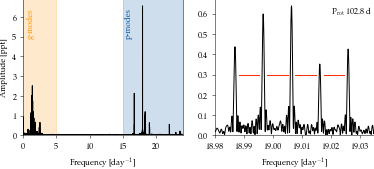

In [92]:
fig, axes = plt.subplots(1,2, figsize=[6.3, 2.5])

ax = axes[0]
f,a = amplitude_spectrum(lc.time.value, lc.flux.value)
ax.plot(f,a*1e3, 'k')
ax.set_xlim(0, 24)
ax.set_ylim(0, None)
ax.axvspan(0, 5, alpha=0.2, color='C2')
ax.axvspan(15, 25, alpha=0.2, color='C0')
ax.text(0.5,5, 'g-modes', c='C2', fontsize=8, rotation=90)
ax.text(15.2,5, 'p-modes', c='C0', fontsize=8, rotation=90)
ax.set_xlabel('Frequency [day$^{-1}$]')
ax.set_ylabel('Amplitude [ppt]')

ax = axes[1]
f,a = amplitude_spectrum(lc.time.value, lc.flux.value, fmin=18.98, fmax=19.035)
peaks = find_peaks(a*1e3, height=0.2, distance=100)[0]
for i in range(len(peaks)-1):
    plt.plot((f[p][i]+0.0013, f[p][i+1]-0.0013), (0.3,0.3), c='C3')
ax.plot(f,a*1e3, 'k')
ax.text(19.02, 0.6, r'P$_{\rm rot}$ 102.8 d', fontsize=8)
ax.set_ylim(0, None)
ax.set_xlim(18.98, 19.035)
ax.set_xlabel('Frequency [day$^{-1}$]')
# plt.savefig('rotation.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)

In [90]:
golden = (1 + 5 ** 0.5) / 2
6.3/2 / golden

1.9468070645621687